In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')   # download the dataset using kaggle link

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ameshawahalathanthri
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:13<00:00, 17.0MB/s]


In [ ]:
BATCH_SIZE =32              # define batch size
IMAGE_SIZE = (128,128)      # define the image size as 128 pixels

In [ ]:
train_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/train"    # load the train dataset from the directory
test_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/test"      # load the test dataset from the directory

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

# define the train dataset by giving its path, batch size, image size, name, validation dataset size (0.1 for validation)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE,
                                                              subset='validation',
                                                              validation_split=0.1,
                                                              seed=42)

# define the validation dataset by giving its path, batch size, image size, name, validation dataset size (0.1 for validation)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)

# define the test dataset by giving its path, batch size, image size

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names    # define class names for future use
class_names                             # display class names (in here 'cats' and 'dogs')

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)                             # display the shape of an image batch (one batch has 32 images, pixels of a image =128, pixels of a image=128, has 3 channels(color image))
  print(label_batch.shape)                             # display the shape of label batch (one batch has 32 labels)

(32, 128, 128, 3)
(32,)


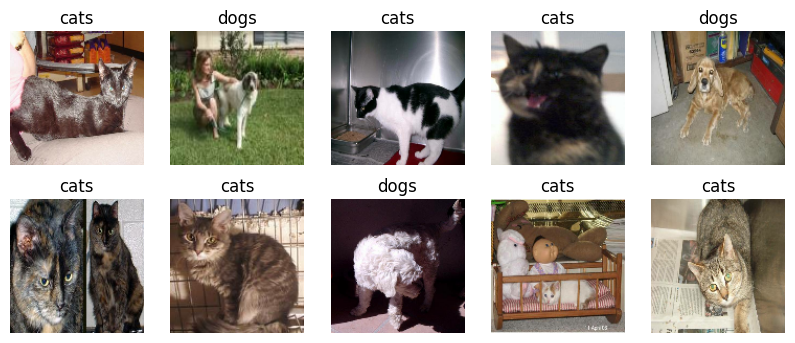

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
  for i in range(10):                                # display 10 images randomly
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image, label in train_data.take(1):     # display the format of images (multi dimensional array)(in here array values are between 0-255)
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [ ]:
# Normalize the data
train_data = train_data.map(lambda x,y:(x/255,y))              # normalize train dataset (divide by 255 to convert the values to number between 0 and 1)
validation_data = validation_data.map(lambda x,y:(x/255,y))    # normalize validation dataset
test_data = test_data.map(lambda x,y:(x/255,y))                # normalize test dataset

In [ ]:
for image, label in train_data.take(1):     # display the format of images after normalization (multi dimensional array)(in here array values are between 0-1)
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),      # flip the image
        tf.keras.layers.RandomRotation(0.2),                                   # rotatte the image
        tf.keras.layers.RandomZoom(0.2),                                       # zoom the image
    ]                                                                          # increase accuracy and no. of data in dataset
)

In [ ]:
# create the model
model = tf.keras.Sequential()                                                # creating a model object using sequential API

model.add(data_augmentation)                                                 # data augmentation

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))      # convolutional layer 1 (32 filters,filter size is 3,3 , activation function is relu)
model.add(tf.keras.layers.MaxPooling2D())                                    # Pooling layer 1 (MaxPooling method)

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))      # convolutional layer 2
model.add(tf.keras.layers.MaxPooling2D())                                    # Pooling layer 2

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))     # convolutional layer 3
model.add(tf.keras.layers.MaxPooling2D())                                    # Pooling layer 3

model.add(tf.keras.layers.Dropout(0.2))                                      # Dropout layer
model.add(tf.keras.layers.BatchNormalization())                              # batch normalization

model.add(tf.keras.layers.Flatten())                                         # flatten the multi dimensional array to 1D array

model.add(tf.keras.layers.Dense(128, activation='relu'))                     # hidden layer 1
model.add(tf.keras.layers.Dense(128, activation='relu'))                     # hidden layer 2
model.add(tf.keras.layers.Dense(32, activation='relu'))                      # hidden layer 3

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                    # output layer

In [ ]:
model.summary()        # display the model architecture (no. of neurons, no. of parameters and etc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),           # Optimize using Adam
              loss=tf.keras.losses.BinaryCrossentropy(),      # cal loss using Binary Cross Entropy
              metrics=["accuracy"])                           # use accuracy to measure performance

In [ ]:
# Train the model
start_time = time.time()              # starting time

history = model.fit(train_data,                         # use train data to train the model
                    epochs=20,                          # define no. of epochs
                    validation_data=validation_data)    # give validation dataset to parameter optimization

end_time = time.time()                # ending take time

Epoch 1/20
225/225 [==============================] - 22s 61ms/step - loss: 0.6758 - accuracy: 0.5783 - val_loss: 0.6792 - val_accuracy: 0.5962
Epoch 2/20
225/225 [==============================] - 18s 79ms/step - loss: 0.6463 - accuracy: 0.6149 - val_loss: 0.6689 - val_accuracy: 0.5600
Epoch 3/20
225/225 [==============================] - 11s 50ms/step - loss: 0.6168 - accuracy: 0.6554 - val_loss: 0.7019 - val_accuracy: 0.5263
Epoch 4/20
225/225 [==============================] - 10s 43ms/step - loss: 0.6067 - accuracy: 0.6635 - val_loss: 0.5993 - val_accuracy: 0.6737
Epoch 5/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5924 - accuracy: 0.6751 - val_loss: 0.6179 - val_accuracy: 0.6775
Epoch 6/20
225/225 [==============================] - 9s 41ms/step - loss: 0.5665 - accuracy: 0.7053 - val_loss: 0.5345 - val_accuracy: 0.7500
Epoch 7/20
225/225 [==============================] - 9s 38ms/step - loss: 0.5538 - accuracy: 0.7158 - val_loss: 0.5147 - val_accuracy: 0

In [ ]:
history.history    # display the values stored in memory during each epoch (loss and accuracy of both train and validate data) (bcz we gave loss and accuracy when compile the model)

{'loss': [0.675846517086029,
  0.6462969779968262,
  0.6167584657669067,
  0.606712281703949,
  0.59239262342453,
  0.5664991140365601,
  0.5538076162338257,
  0.5417008399963379,
  0.5194270014762878,
  0.5066887140274048,
  0.4938625395298004,
  0.4826536476612091,
  0.4807800352573395,
  0.4527409076690674,
  0.44748297333717346,
  0.43744680285453796,
  0.4247901141643524,
  0.4204581081867218,
  0.4099394679069519,
  0.3989918828010559],
 'accuracy': [0.57833331823349,
  0.6148611307144165,
  0.6554166674613953,
  0.6634722352027893,
  0.6751388907432556,
  0.7052778005599976,
  0.715833306312561,
  0.7236111164093018,
  0.7372221946716309,
  0.7524999976158142,
  0.7561110854148865,
  0.7684721946716309,
  0.7644444704055786,
  0.7847222089767456,
  0.7868055701255798,
  0.7927777767181396,
  0.8016666769981384,
  0.8058333396911621,
  0.8094444274902344,
  0.8133333325386047],
 'val_loss': [0.6791543364524841,
  0.6689040660858154,
  0.7019152045249939,
  0.5992739200592041,
  0

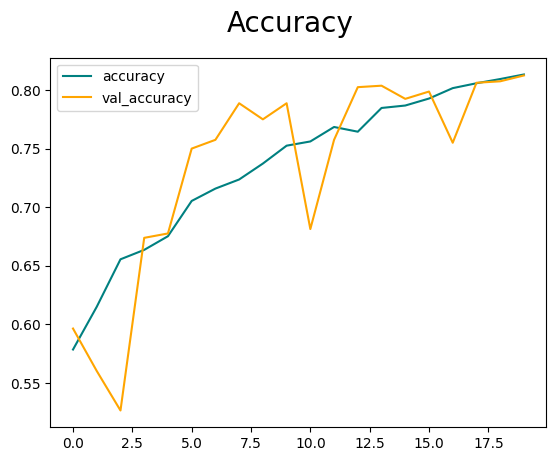

In [ ]:
fig = plt.figure()                                                                 # plot the accuracy of train and validation data stored in history
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

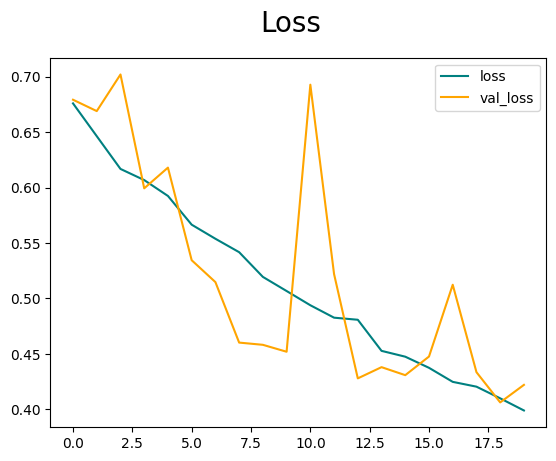

In [ ]:
fig = plt.figure()                                                          # plot the loss of train and validation data stored in history
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [ ]:
# model evaluation
precision = tf.keras.metrics.Precision()           # define the precision
recall = tf.keras.metrics.Recall()                 # define the recall
accuracy = tf.keras.metrics.BinaryAccuracy()       # define the binary accuracy

In [ ]:
for batch in test_data.as_numpy_iterator():        # use test dataset
  x,y = batch                                      # get all the batches as x,y (x=image, y=label)
  yhat = model.predict(x)                          # predict the value of y (label- cats/dogs)
  precision.update_state(y, yhat)                  # cal the precision for every image using y and yhat
  recall.update_state(y, yhat)                     # cal the recall for every image using y and yhat
  accuracy.update_state(y, yhat)                   # cal the accuracy for every image using y and yhat

1/1 [==============================] - 0s 343ms/step


In [ ]:
precision.result()     # display the precision for test set

<tf.Tensor: shape=(), dtype=float32, numpy=0.73145163>

In [ ]:
recall.result()        # display the recall for test set

<tf.Tensor: shape=(), dtype=float32, numpy=0.907>

In [ ]:
accuracy.result()      # display the accuracy for test set

<tf.Tensor: shape=(), dtype=float32, numpy=0.787>

In [ ]:
!pip install opencv.python      # to read an image

In [ ]:
import cv2

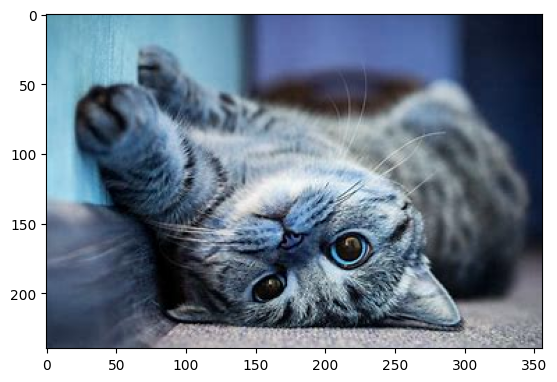

In [ ]:
image = cv2.imread("/content/test2.jpeg")     # read the image by giving the path
plt.imshow(image)                             # display image
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)      # set the image size to (128,128)
scaled_image = resized_image/255                        # convert array to values between 0-1 by dividing 255

In [ ]:
scaled_image      # display the array of image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.3581495 , 0.61697304, 0.6875613 ],
        [0.3647059 , 0.6156863 , 0.6862745 ],
        [0.3778799 , 0.62101716, 0.6916054 ],
        ...,
        [0.02352941, 0.05098039, 0.1254902 ],
        [0.015625  , 0.04571078, 0.11237745],
        [0.02352941, 0.05098039, 0.10980392]],

       [[0.36329657, 0.6221201 , 0.6966299 ],
        [0.36985293, 0.61691177, 0.69534314],
        [0.38302696, 0.6222426 , 0.700674  ],
        ...,
        [0.02352941, 0.05098039, 0.1254902 ],
        [0.015625  , 0.04571078, 0.11237745],
        [0.02352941, 0.05098039, 0.10980392]],

       [[0.3713848 , 0.6302083 , 0.7047181 ],
        [0.38112745, 0.6281863 , 0.70661765],
        [0.3911152 , 0.63033086, 0.7087622 ],
        ...,
        [0.02352941, 0.05098039, 0.1254902 ],
        [0.015625  , 0.04571078, 0.11237745],
        [0.02352941, 0.05098039, 0.10980392]],

       ...,

       [[0.16578968, 0.20892693, 0.2873583 ],
        [0.16

In [ ]:
np.expand_dims(scaled_image, 0).shape    # add another rank to the image shape to make it 4 (default it has 3 ranks)

(1, 128, 128, 3)

In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))       # predict the image label

1/1 [==============================] - 0s 18ms/step


In [ ]:
y_hat       # display the predicted y value (probability)

array([[0.20586082]], dtype=float32)

In [ ]:
class_names     # display class names ('cats' , 'dogs')

['cats', 'dogs']

In [ ]:
if y_hat >= 0.5:
  print(class_names[1])   # if y_hat value is greater than 0.5, value of index 1 of class_names should be printed ('dogs')
else:
  print(class_names[0])    # else value of index 0 of class_names should be printed ('dogs')

cats
